## Goals
Our goal with this analysis is to determine if it makes sense to spend money on a player who has scored a lot of goals in hockey.

This analysis is based on three criterias. First two are considering number of the goals scored and last one is identifying  players who have scored high number of goals and are also being considered based on their other attributes.

First, Identify the players who have scored the most goals over all 5 years. (In this case, top 10 players have been chosen)
Secondly, after identifying the top scorers, determine if they have been consistent over the years.

In the end, if we were to choose a player with other attributes, does it make sense to choose one who has scored atleast 30 goals (number chosen for this analysis, could be any number) and have scored minimum of those number goals over the years. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
%matplotlib inline
%run ./data-loading.ipynb

In [2]:
# Fetch the common set of player data everyone on the team is working with
player_data = fetch_player_data()

player_data.head()


Team Position  GP          TOI  Goals  Total Assists  \
Year Player                                                               
2015 Jamie Benn     DAL        F  82  1635.733333     35             52   
     John Tavares   NYI        F  82  1695.200000     38             48   
     Sidney Crosby  PIT        F  77  1538.533333     28             56   
     Alex Ovechkin  WSH        F  81  1646.400000     53             28   
     Jakub Voracek  PHI        F  82  1524.633333     22             59   

                    First Assists  Second Assists  Total Points  Shots    SH%  \
Year Player                                                                     
2015 Jamie Benn                32              20            87    253  13.83   
     John Tavares              30              18            86    278  13.67   
     Sidney Crosby             31              25            84    237  11.81   
     Alex Ovechkin             21               7            81    395  13.42   
     Jakub Voracek             31              28            81    221   9.95   

                    Shot Attempts  Hits  Hits Taken  
Year Player                                          
2015 Jamie Benn               466   120         101  
     John Tavares             471    48         103  
     Sidney Crosby            380    66         117  
     Alex Ovechkin            825   259         108  
     Jakub Voracek            424    55         139

In [3]:
# We want to find the players with most goals scored and the number of games played 

def get_sum_goals_and_games(x):
    d = {}
    d['Total_Goals_Scored'] = x['Goals'].sum()
    d['Total_Games_Played'] = x['GP'].sum()
    d['Total_Goals_Scored/Total_Games_Played'] = x['Goals'].sum()/x['GP'].sum()
    return pd.Series(d, index=['Total_Goals_Scored', 'Total_Games_Played', 'Total_Goals_Scored/Total_Games_Played'])

In [4]:
# Function to get the total games played over 5 years
def get_total_games_played(data):
    return data.groupby(['Year']).GP.agg('max').sum()

In [5]:
# This function returns the data with max gaols within the number of games
def get_top_goals_scorers(data, number):
    player_data_with_Most_Goals = data.groupby('Player').apply(get_sum_goals_and_games).sort_values(by='Total_Goals_Scored', ascending=False).head(number)
    return player_data_with_Most_Goals
   

In [6]:
#Get yearly data for top 5 most goal scorers
def get_yearly_data_for_dataset(data):
    return player_data[player_data.index.get_level_values(1).isin(data.index.get_level_values(0))]

In [7]:
# This function creates the bar graph for the data 
def plot_top_goals_scorers(data):
    data.plot(kind='bar',  stacked=True, figsize=(10, 7));

In [8]:
#Function to prepare crosstab for the dataset
def prepare_crosstab(data, index, column,value):
    data.reset_index(drop=False, inplace=True)
    return pd.crosstab(index = data[index], columns=data[column], values=data[value],  aggfunc='sum')

In [9]:
#Function to plot the graph for the dataset
def plot_graph(data, title, xlabel, ylabel):
    Plot = data.plot(style="-o",
                                    title=title)
    Plot.set_ylabel(ylabel)
    Plot.set_xlabel(xlabel)

    Plot.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)

    ticks =[2015,2016,2017,2018,2019] 
    
    Plot.set_xticks(ticks, minor=False)

    tmp = Plot.plot()

In [10]:
#Function to get the Goals for the player
def get_player_goals(player_name):
    players_year_data = player_data[player_data.index.get_level_values(1) == player_name]
    return players_year_data['Goals']

In [11]:
#Function to get the parameters for the regression based on the dataframe passed
def get_line_params(player_yearly_goals):
    years = player_yearly_goals.index.get_level_values(0)
    goals = player_yearly_goals.values
    x = sm.add_constant(years)
    result = sm.OLS(goals, x).fit()
    intercept,slope = result.params
    return intercept,slope

In [12]:
# Function to select the players with specific number of goals 
def get_players_with_specific_goals(data,number):
    return data[data['Goals']>=number]

In [13]:
# Function to add the count column in the dataset
def add_players_count(data,column):
    data.reset_index(drop=False, inplace=True)
    data['count']=data.groupby(column)[column].transform('count')
    return data[data['count']>2]

**Criteria 1:** First, lets look at the players who scored the most number of goals and the total number of games played.

In [14]:
#Get top 10 goal scorers
top10 = get_top_goals_scorers(player_data,10)
top10

,Total_Goals_Scored,Total_Games_Played,Total_Goals_Scored/Total_Games_Played
Player,,,
Alex Ovechkin,236.0,405.0,0.582716
John Tavares,183.0,401.0,0.456359
Vladimir Tarasenko,182.0,395.0,0.460759
Nikita Kucherov,179.0,395.0,0.453165
Patrick Kane,178.0,388.0,0.458763
Sidney Crosby,172.0,393.0,0.437659
Brad Marchand,170.0,381.0,0.446194
Tyler Seguin,169.0,389.0,0.434447
Jamie Benn,165.0,401.0,0.411471


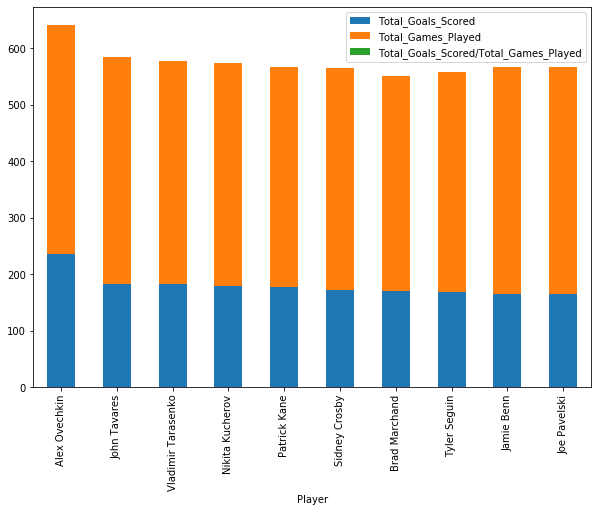

In [15]:
#Plot top 10 goal scorers
plot_top_goals_scorers(top10)

Above study shows that Alex Ovechkin scored the highest number of goals in all 5 years. 
He also played quite a significant number of games in these 5 years (405 out of 410). 
However, this alone does not determine that he should be chosen. We also have to look at the player who has been 
consistent over all 5 years. For that analysis we choose top 5 goal scorers.

**Criteria 2:** Now, lets look at the top five players who have been consistent over the years.

In [16]:
#Get top 5 most goal scorers
top5 = get_top_goals_scorers(player_data,5)
top5

,Total_Goals_Scored,Total_Games_Played,Total_Goals_Scored/Total_Games_Played
Player,,,
Alex Ovechkin,236.0,405.0,0.582716
John Tavares,183.0,401.0,0.456359
Vladimir Tarasenko,182.0,395.0,0.460759
Nikita Kucherov,179.0,395.0,0.453165
Patrick Kane,178.0,388.0,0.458763


In [17]:
#Get yearly data for top 5 most goal scorers
top5_data=get_yearly_data_for_dataset(top5)
top5_data

Team Position  GP          TOI  Goals  Total Assists  \
Year Player                                                                    
2015 John Tavares        NYI        F  82  1695.200000     38             48   
     Alex Ovechkin       WSH        F  81  1646.400000     53             28   
     Vladimir Tarasenko  STL        F  77  1356.566667     37             36   
     Nikita Kucherov     T.B        F  82  1225.983333     29             36   
     Patrick Kane        CHI        F  61  1211.666667     27             37   
2016 Patrick Kane        CHI        F  82  1672.883333     46             60   
     Vladimir Tarasenko  STL        F  80  1491.016667     40             34   
     Alex Ovechkin       WSH        F  79  1604.366667     50             21   
     John Tavares        NYI        F  78  1559.566667     33             37   
     Nikita Kucherov     T.B        F  77  1402.350000     30             36   
2017 Patrick Kane        CHI        F  82  1754.383333     34             55   
     Nikita Kucherov     T.B        F  74  1438.666667     40             45   
     Vladimir Tarasenko  STL        F  82  1514.533333     39             36   
     Alex Ovechkin       WSH        F  82  1506.016667     33             36   
     John Tavares        NYI        F  77  1572.250000     28             38   
2018 Nikita Kucherov     T.B        F  80  1585.716667     39             61   
     Alex Ovechkin       WSH        F  82  1651.833333     49             38   
     John Tavares        NYI        F  82  1633.866667     37             47   
     Patrick Kane        CHI        F  82  1655.300000     27             49   
     Vladimir Tarasenko  STL        F  80  1524.566667     33             33   
2019 Nikita Kucherov     T.B        F  82  1637.166667     41             87   
     Patrick Kane        CHI        F  81  1821.616667     44             66   
     Alex Ovechkin       WSH        F  81  1694.616667     51             38   
     John Tavares        TOR        F  82  1565.316667     47             41   
     Vladimir Tarasenko  STL        F  76  1397.283333     33             35   

                         First Assists  Second Assists  Total Points  Shots  \
Year Player                                                                   
2015 John Tavares                   30              18            86    278   
     Alex Ovechkin                  21               7            81    395   
     Vladimir Tarasenko             17              19            73    264   
     Nikita Kucherov                22              14            65    191   
     Patrick Kane                   25              12            64    186   
2016 Patrick Kane                   41              19           106    287   
     Vladimir Tarasenko             16              18            74    292   
     Alex Ovechkin                   6              15            71    398   
     John Tavares                   31               6            70    250   
     Nikita Kucherov                25              11            66    209   
2017 Patrick Kane                   36              19            89    292   
     Nikita Kucherov                28              17            85    246   
     Vladimir Tarasenko             18              18            75    286   
     Alex Ovechkin                  20              16            69    313   
     John Tavares                   21              17            66    260   
2018 Nikita Kucherov                33              28           100    279   
     Alex Ovechkin                  20              18            87    355   
     John Tavares                   28              19            84    258   
     Patrick Kane                   31              18            76    285   
     Vladimir Tarasenko             16              17            66    306   
2019 Nikita Kucherov                53              34           128    246   
     Patrick Kane                   40        

In [18]:
hockey_data_with_top5_Subset = prepare_crosstab(top5_data, "Year", "Player","Goals")
hockey_data_with_top5_Subset

Player,Alex Ovechkin,John Tavares,Nikita Kucherov,Patrick Kane,Vladimir Tarasenko
Year,,,,,
2015,53,38,29,27,37
2016,50,33,30,46,40
2017,33,28,40,34,39
2018,49,37,39,27,33
2019,51,47,41,44,33


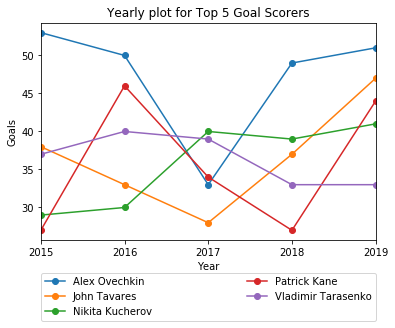

In [19]:
plot_graph(hockey_data_with_top5_Subset, "Yearly plot for Top 5 Goal Scorers", "Year", "Goals")

Above graph indicates that even though Alex Ovechkin scored the highest number of goals in all 5 years. He has not been consistent 
over the years as his scores dropped significantly in 2017. We will be looking at the regression lines to see which player amongst the top 5
goal scorers has been consistently improving over the years.


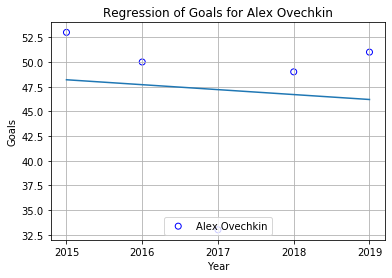

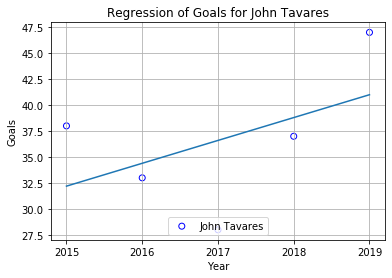

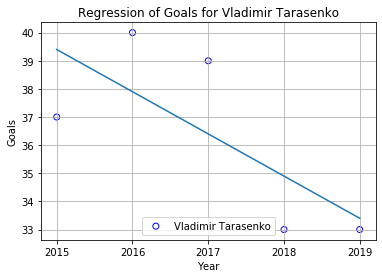

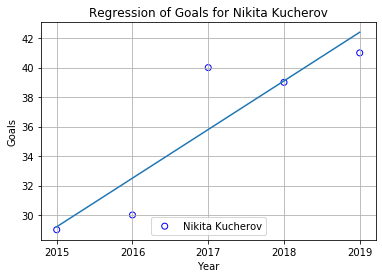

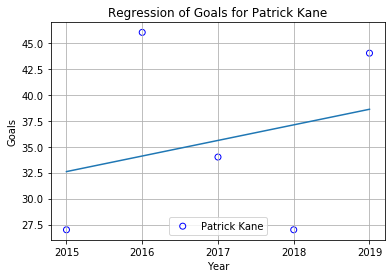

In [20]:
#Iterate through top 5 players in order to plot their graphs
for player in top5.index:
#    print(player)
    
    # for each player, get their goals in every year
    player_yearly_goals = get_player_goals(player)
    
    # get the params for the line of regression
    intercept, slope = get_line_params(player_yearly_goals)

    years = player_yearly_goals.index.get_level_values(0)
    
    # plot the goals
    plt.scatter( years, player_yearly_goals.values,
         marker='o', facecolors='none', edgecolors='b',
         label=player)
    
    # plot the line of regression
    plt.plot(  years, intercept + slope* years)
    
    plt.xlabel('Year') ; 
    plt.ylabel('Goals')
    plt.title('Regression of Goals for '+player) ;
    plt.xticks([2015,2016,2017,2018,2019])
    plt.grid() ;
    plt.legend(loc='lower center')
    plt.show()

As illustrated above, there are 3 top players with an upward trend in terms of scoring goals year after year namely John Tavares (slope = 2.2), Patrick Kane (slope =1.5) and Nikita Kucherov (3.3)
    
Nikita Kucherov has the maximum slope and has been consistently improving over the years. 


**Criteria 3:** Now, lets identify players who have scored minimum of 30 goals (number chosen for this analysis, could be any number) and have scored minimum of those number goals over the years. This criteria will help us choose the player who has consistently scored more than 30 goals from the list of players who could be potential candidates based on other attributes.  

In [21]:
#For our analysis, we are considering players who have scored atleast 30 goals
Players_with_specific_goals = get_players_with_specific_goals(player_data, 30)
Players_with_specific_goals


Team Position  GP          TOI  Goals  Total Assists  \
Year Player                                                                    
2015 Jamie Benn          DAL        F  82  1635.733333     35             52   
     John Tavares        NYI        F  82  1695.200000     38             48   
     Alex Ovechkin       WSH        F  81  1646.400000     53             28   
     Tyler Seguin        DAL        F  71  1388.133333     37             40   
     Jiri Hudler         CGY        F  78  1404.733333     31             45   
     Nick Foligno        CBJ        F  79  1487.550000     31             42   
     Vladimir Tarasenko  STL        F  77  1356.566667     37             36   
     Steven Stamkos      T.B        F  82  1588.150000     43             29   
     Joe Pavelski        S.J        F  82  1650.250000     37             33   
     Rick Nash           NYR        F  79  1378.783333     42             27   
     Max Pacioretty      MTL        F  80  1551.516667     37             30   
     Radim Vrbata        VAN        F  79  1312.333333     31             32   
     Zach Parise         MIN        F  74  1418.416667     33             29   
     Sean Monahan        CGY        F  81  1589.333333     31             31   
     Corey Perry         ANA        F  67  1212.750000     33             22   
2016 Patrick Kane        CHI        F  82  1672.883333     46             60   
     Jamie Benn          DAL        F  82  1641.800000     41             48   
     Sidney Crosby       PIT        F  80  1637.550000     36             49   
     Joe Pavelski        S.J        F  82  1624.900000     38             40   
     Johnny Gaudreau     CGY        F  79  1573.316667     30             48   
     Artemi Panarin      CHI        F  80  1480.866667     30             47   
     Vladimir Tarasenko  STL        F  80  1491.016667     40             34   
     Tyler Seguin        DAL        F  72  1399.850000     33             40   
     Alex Ovechkin       WSH        F  79  1604.366667     50             21   
     John Tavares        NYI        F  78  1559.566667     33             37   
     Patrice Bergeron    BOS        F  80  1586.783333     32             36   
     Nikita Kucherov     T.B        F  77  1402.350000     30             36   
     Max Pacioretty      MTL        F  82  1519.233333     30             34   
     Steven Stamkos      T.B        F  77  1521.100000     36             28   
     Filip Forsberg      NSH        F  82  1562.316667     33             31   
...                      ...      ...  ..          ...    ...            ...   
2019 John Tavares        TOR        F  82  1565.316667     47             41   
     Mikko Rantanen      COL        F  74  1542.300000     31             56   
     Mark Scheifele      WPG        F  82  1792.700000     38             46   
     Sebastian Aho       CAR        F  82  1652.366667     30             53   
     Sean Monahan        CGY        F  78  1486.266667     34             48   
     Jonathan Toews      CHI        F  82  1722.566667     35             46   
     David Pastrnak      BOS        F  66  1237.750000     38             43   
     Tyler Seguin        DAL        F  82  1701.366667     33             47   
     Patrice Bergeron    BOS        F  65  1200.366667     32             47   
     Matthew Tkachuk     CGY        F  80  1407.916667     34             43   
     Sean Couturier      PHI        F  80  1770.166667     33             43   
     Jake Guentzel       PIT        F  82  1586.750000     40             36   
     Alex DeBrincat      CHI        F  82  1451.400000     41             35   
     Gabriel Landeskog   COL        F  73  1543.850000     34             41   
     Mika Zibanejad      NYR        F  82  1685.800000     30             44   
     Tomas Hertl         S.J        F  77  1464.516667     35             39   
     Dylan Larkin        DET        F  76  1660.000000     32             41   
     Auston Matthews    

In [22]:
#Get the players who have scored more than 30 goals atleast 3 times 
Playerscount3 = add_players_count(Players_with_specific_goals,'Player')
Playerscount3

C:\Users\vinee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,Shots,SH%,Shot Attempts,Hits,Hits Taken,count
0,2015,Jamie Benn,DAL,F,82,1635.733333,35,52,32,20,87,253,13.83,466,120,101,3
1,2015,John Tavares,NYI,F,82,1695.200000,38,48,30,18,86,278,13.67,471,48,103,4
2,2015,Alex Ovechkin,WSH,F,81,1646.400000,53,28,21,7,81,395,13.42,825,259,108,5
3,2015,Tyler Seguin,DAL,F,71,1388.133333,37,40,33,7,77,280,13.21,529,63,34,4
6,2015,Vladimir Tarasenko,STL,F,77,1356.566667,37,36,17,19,73,264,14.02,531,32,93,5
7,2015,Steven Stamkos,T.B,F,82,1588.150000,43,29,22,7,72,268,16.04,509,91,93,3
8,2015,Joe Pavelski,S.J,F,82,1650.250000,37,33,22,11,70,261,14.18,440,97,77,3
10,2015,Max Pacioretty,MTL,F,80,1551.516667,37,30,17,13,67,302,12.25,561,106,145,3
13,2015,Sean Monahan,CGY,F,81,1589.333333,31,31,20,11,62,191,16.23,344,39,50,3
15,2016,Patrick Kane,CHI,F,82,1672.883333,46,60,41,19,106,287,16.03,461,37,130,3


In [23]:
hockey_data_with_Specific_Goals_Subset = prepare_crosstab(Playerscount3, "Year", "Player","Goals")
hockey_data_with_Specific_Goals_Subset

Player,Alex Ovechkin,Auston Matthews,Brad Marchand,Connor McDavid,David Pastrnak,Jamie Benn,Joe Pavelski,John Tavares,Max Pacioretty,Nikita Kucherov,Patrice Bergeron,Patrick Kane,Patrik Laine,Sean Monahan,Sidney Crosby,Steven Stamkos,Tyler Seguin,Vladimir Tarasenko
Year,,,,,,,,,,,,,,,,,,
2015,53.0,NaN,NaN,NaN,NaN,35.0,37.0,38.0,37.0,NaN,NaN,NaN,NaN,31.0,NaN,43.0,37.0,37.0
2016,50.0,NaN,37.0,NaN,NaN,41.0,38.0,33.0,30.0,30.0,32.0,46.0,NaN,NaN,36.0,36.0,33.0,40.0
2017,33.0,40.0,39.0,30.0,34.0,NaN,NaN,NaN,35.0,40.0,NaN,34.0,36.0,NaN,44.0,NaN,NaN,39.0
2018,49.0,34.0,34.0,41.0,35.0,36.0,NaN,37.0,NaN,39.0,30.0,NaN,44.0,31.0,NaN,NaN,40.0,33.0
2019,51.0,37.0,36.0,41.0,38.0,NaN,38.0,47.0,NaN,41.0,32.0,44.0,30.0,34.0,35.0,45.0,33.0,33.0


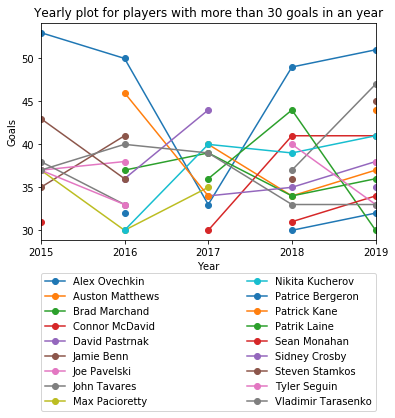

In [24]:
#Plot the graph how many times have they scored more than 30
plot_graph(hockey_data_with_Specific_Goals_Subset, "Yearly plot for players with more than 30 goals in an year", "Year", "Goals")

**Conclusion**

If we just look at the top goal scorer over the five years then Alex Ovechkin should be chosen. However Nikita Kucherov 
has been consistently improving over years.

And from the above graph we can identify players who have scored minimum of 30 goals and have scored minimum of those number goals over the years. So that in case there was a list of potential candidates who have been identified based on other attributes, it could become easier to choose the player who has also scored minimum number of goals and has been consistent with this number over the years.